In [1]:
# CREATING LATITUDE AND LONGITUDE COMBINATIONS

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import datetime
from datetime import datetime
import time

# Import the requests library
import requests
# Import the API key
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)



In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

coordinates

[(-19.381523007092184, 168.82092996645707),
 (54.097476818922814, -145.7005241031639),
 (-57.92295419331576, -89.07396175410081),
 (44.57319699934206, 146.84044180326367),
 (77.63838806003366, -159.64901845978048),
 (-73.13400865497078, -151.71682455688432),
 (34.6232650118057, 95.25919614832861),
 (-54.34503048383007, -69.2615267782707),
 (86.35809163474119, -45.94043067370362),
 (-0.596602420020659, 119.27510334542546),
 (-77.54987149541702, 59.197567927803306),
 (64.91019861768393, -57.521908150070004),
 (9.02126036911703, 26.705556306737293),
 (55.992828514494505, 39.22076669390162),
 (-56.006948974158014, 31.81937777708964),
 (78.36865654402811, -24.39604398808362),
 (6.871360559375006, 88.15978839509239),
 (-70.702592153361, 130.30921477841127),
 (-12.499721626180985, -73.24153099976029),
 (-25.746167150206944, -169.8500349627731),
 (19.60830640199056, -84.12179856129882),
 (-78.22005380510814, 178.61989120321147),
 (58.689393154963426, 165.4738959580107),
 (-41.09813699160688, 8

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [5]:
cities

['omutinskoye',
 'fort saint john',
 'avarua',
 'barrow',
 'bluff',
 'marstal',
 'castro',
 'rikitea',
 'thompson',
 'omsukchan',
 'aktau',
 'mitsamiouli',
 'strezhevoy',
 'mnogovershinnyy',
 'vila velha',
 'airai',
 'ankazoabo',
 'grand gaube',
 'puerto montt',
 'punta arenas',
 'vaini',
 'la serena',
 'launceston',
 'abu samrah',
 'okha',
 'hermanus',
 'albany',
 'vao',
 'mataura',
 'ponta do sol',
 'zhigansk',
 'asau',
 'basco',
 'victoria',
 'faya',
 'ushuaia',
 'nieuw amsterdam',
 'east london',
 'ukiah',
 'kodiak',
 'miyakonojo',
 'subirana',
 'cape town',
 'mys shmidta',
 'provideniya',
 'bardiyah',
 'lagoa',
 'codrington',
 'san carlos de bariloche',
 'tsihombe',
 'yellowknife',
 'port alfred',
 'severo-kurilsk',
 'taolanaro',
 'dikson',
 'preobrazheniye',
 'guzelyurt',
 'new norfolk',
 'polyarnyy',
 'biak',
 'kapaa',
 'gat',
 'mar del plata',
 'busselton',
 'port elizabeth',
 'belem de sao francisco',
 'oksfjord',
 'caravelas',
 'durham',
 'vestmanna',
 'liverpool',
 'katsuura

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e613b12a1a4ccf4a379595ee587a136


In [7]:
# # Create an endpoint URL for a city.
# city_url = url + "&q=" + "Boston"

# # Make a 'get' request for the city weather
# city_weather = requests.get(city_url)

# # # Checking response
# # if city_weather.status_code == 200:
# #     print(f"City Weather found.")
# # else:
# #     print(f"City weather not found.")

In [8]:
# # Get the text of the 'get' request
# city_weather.json()

In [9]:
# # getting the JSON data
# boston_data = city_weather.json()

In [10]:
# lat = boston_data["coord"]["lat"]
# lng = boston_data["coord"]["lon"]
# max_temp = boston_data["main"]["temp_max"]
# humidity = boston_data["main"]["humidity"]
# clouds = boston_data["clouds"]["all"]
# wind = boston_data["wind"]["speed"]
# print(lat, lng, max_temp, humidity, clouds, wind)

In [11]:
# # Import the datetime module from the datetime library.
# from datetime import datetime
# # Get the date from the JSON file.
# date = boston_data["dt"]
# # Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
# datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | omutinskoye
City not found. Skipping...
Processing Record 2 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | marstal
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | omsukchan
Processing Record 11 of Set 1 | aktau
Processing Record 12 of Set 1 | mitsamiouli
Processing Record 13 of Set 1 | strezhevoy
Processing Record 14 of Set 1 | mnogovershinnyy
Processing Record 15 of Set 1 | vila velha
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | ankazoabo
Processing Record 18 of Set 1 | grand gaube
Processing Record 19 of Set 1 | puerto montt
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | la serena
Processing Record 23 of Set 1 | l

Processing Record 41 of Set 4 | central point
Processing Record 42 of Set 4 | eldikan
City not found. Skipping...
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | tawkar
City not found. Skipping...
Processing Record 45 of Set 4 | erzin
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 48 of Set 4 | carahue
Processing Record 49 of Set 4 | vera cruz
Processing Record 50 of Set 4 | khatanga
Processing Record 1 of Set 5 | mackay
Processing Record 2 of Set 5 | tikrit
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | saleaula
City not found. Skipping...
Processing Record 5 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 5 | babanusah
City not found. Skipping...
Processing Record 7 of Set 5 | baykit
Processing Record 8 of Set 5 | hanover
Processing Record 9 of Set 5 | papetoai
Processing Record 10 of Set 5 | chuy
Processing Record 11 o

Processing Record 25 of Set 8 | waitati
Processing Record 26 of Set 8 | bemidji
Processing Record 27 of Set 8 | kamenka
Processing Record 28 of Set 8 | ketchikan
Processing Record 29 of Set 8 | bulaevo
Processing Record 30 of Set 8 | sorong
Processing Record 31 of Set 8 | manitouwadge
Processing Record 32 of Set 8 | newport beach
Processing Record 33 of Set 8 | klaksvik
Processing Record 34 of Set 8 | aguilas
Processing Record 35 of Set 8 | itacare
Processing Record 36 of Set 8 | chicama
Processing Record 37 of Set 8 | alihe
Processing Record 38 of Set 8 | gallup
Processing Record 39 of Set 8 | san ramon de la nueva oran
Processing Record 40 of Set 8 | kutoarjo
Processing Record 41 of Set 8 | virarajendrapet
Processing Record 42 of Set 8 | lolua
City not found. Skipping...
Processing Record 43 of Set 8 | yulin
Processing Record 44 of Set 8 | saint-joseph
Processing Record 45 of Set 8 | warri
Processing Record 46 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 47 of 

Processing Record 13 of Set 12 | bereda
Processing Record 14 of Set 12 | santa flavia
Processing Record 15 of Set 12 | shagonar
Processing Record 16 of Set 12 | billings
Processing Record 17 of Set 12 | fortuna
Processing Record 18 of Set 12 | rurrenabaque
Processing Record 19 of Set 12 | humberto de campos
Processing Record 20 of Set 12 | kibala
Processing Record 21 of Set 12 | yarada
Processing Record 22 of Set 12 | rudbar
Processing Record 23 of Set 12 | san policarpo
Processing Record 24 of Set 12 | laguna
Processing Record 25 of Set 12 | oum hadjer
Processing Record 26 of Set 12 | stephenville
Processing Record 27 of Set 12 | sao felix do xingu
Processing Record 28 of Set 12 | bati
Processing Record 29 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 30 of Set 12 | havoysund
Processing Record 31 of Set 12 | staunton
Processing Record 32 of Set 12 | iglesias
Processing Record 33 of Set 12 | bijie
Processing Record 34 of Set 12 | bojnurd
Processing Record 35 of Set

In [14]:
len(city_data)

580

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,82.45,69,75,6.91,CK,2021-12-20 02:50:51
1,Barrow,71.2906,-156.7887,6.82,78,90,33.38,US,2021-12-20 02:50:16
2,Bluff,-46.6000,168.3333,63.81,84,99,30.65,NZ,2021-12-20 02:49:37
3,Marstal,54.8562,10.5173,39.90,76,0,17.22,DK,2021-12-20 02:52:19
4,Castro,-24.7911,-50.0119,54.43,93,15,5.95,BR,2021-12-20 02:52:20


In [16]:
# Re-ordering columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]

In [2]:
# Changing column order
city_data_df=city_data_df[new_column_order]

NameError: name 'city_data_df' is not defined

In [3]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [5]:
# File to Load (Remember to change these)
data_to_load = "weather_data/cities.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(data_to_load)


In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

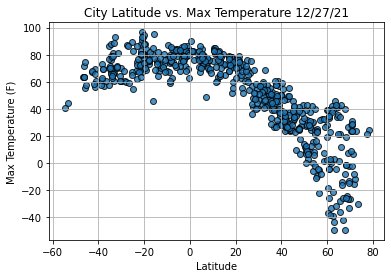

In [7]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

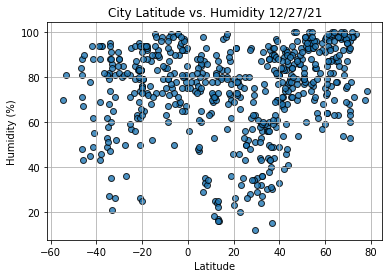

In [8]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

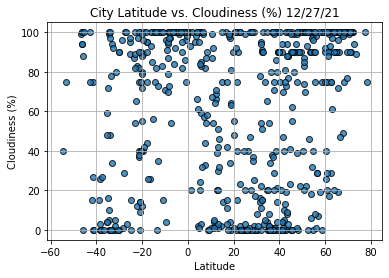

In [9]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

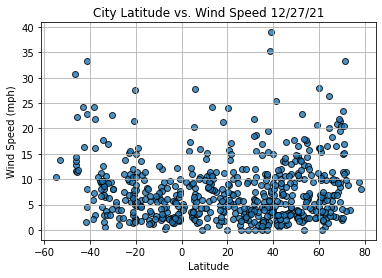

In [10]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

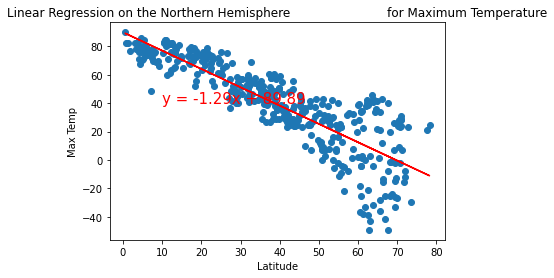

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

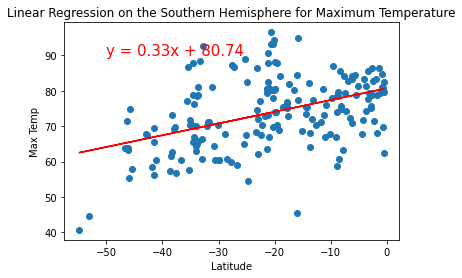

In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

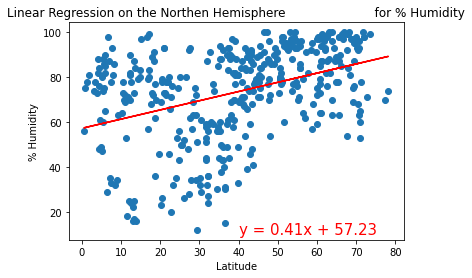

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northen Hemisphere \
                      for % Humidity', '% Humidity', (40,10))

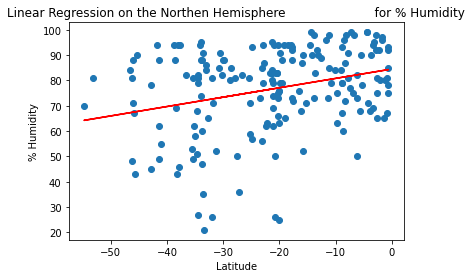

In [32]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northen Hemisphere \
                      for % Humidity', '% Humidity', (-50,15))

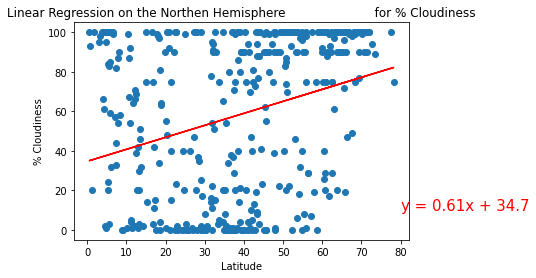

In [34]:
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northen Hemisphere \
                      for % Cloudiness', '% Cloudiness', (80,10))

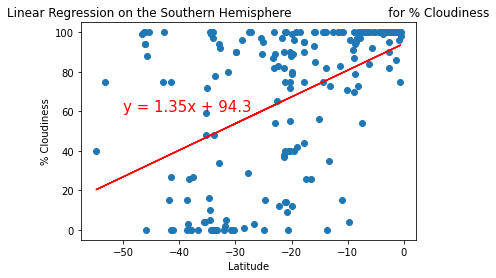

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

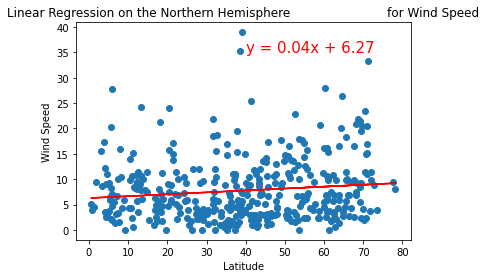

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

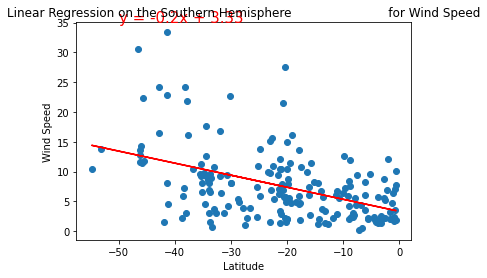

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))